In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [82]:
import warnings
warnings.filterwarnings('ignore')

## Beginning Steps:

In [83]:
#import data
df = pd.read_csv("hw2_data.csv")

In [23]:
df.shape

(10000, 377)

In [ ]:
df.head()

,identifier,label,plmc_score_0,evfold_f_score_0,evfold_coupling_score_0,gdca score_0,ccmpred score_0,plmc_score_1,evfold_f_score_1,evfold_coupling_score_1,...,plmc_score_73,evfold_f_score_73,evfold_coupling_score_73,gdca score_73,ccmpred score_73,plmc_score_74,evfold_f_score_74,evfold_coupling_score_74,gdca score_74,ccmpred score_74
0,123-244-302,0,0.040955,0.025859,0.127420,-0.023090,0.022483,0.040857,0.007351,0.027002,...,0.100352,0.101245,0.133986,0.112985,0.088278,0.118441,0.096444,0.112452,0.095230,0.128216
1,40-146-168,1,0.067299,0.027890,0.170190,-0.059002,0.119973,-0.019265,0.030167,-0.021102,...,0.260093,0.260328,0.263097,0.244163,0.224830,0.262140,0.224038,0.258516,0.231580,0.208588
2,41-16-286,1,-0.178193,-0.073671,-0.036300,-0.092107,-0.076421,0.018439,0.516717,0.533780,...,0.144847,0.139309,0.112727,0.135829,0.120054,0.221779,0.226808,0.197216,0.238952,0.220696
3,39-115-217,0,0.050864,0.055261,0.007699,-0.068535,-0.066980,-0.032308,-0.023266,-0.003812,...,0.117390,0.113883,0.111102,0.106552,0.188668,0.082475,0.094464,0.061396,0.105911,0.142063
4,80-13-211,0,-0.040199,-0.001166,-0.023016,0.025099,-0.042061,-0.045944,-0.030137,0.000206,...,0.151668,0.111351,0.129860,0.109637,0.154310,0.114317,0.114218,0.127280,0.156136,0.138213


In [ ]:
df.columns

Index(['identifier', 'label', 'plmc_score_0', 'evfold_f_score_0',
       'evfold_coupling_score_0', 'gdca score_0', 'ccmpred score_0',
       'plmc_score_1', 'evfold_f_score_1', 'evfold_coupling_score_1',
       ...
       'plmc_score_73', 'evfold_f_score_73', 'evfold_coupling_score_73',
       'gdca score_73', 'ccmpred score_73', 'plmc_score_74',
       'evfold_f_score_74', 'evfold_coupling_score_74', 'gdca score_74',
       'ccmpred score_74'],
      dtype='object', length=377)

In [ ]:
#set max_columns and max_rows to none for viewing:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,identifier,label,plmc_score_0,evfold_f_score_0,evfold_coupling_score_0,gdca score_0,ccmpred score_0,plmc_score_1,evfold_f_score_1,evfold_coupling_score_1,gdca score_1,ccmpred score_1,plmc_score_2,evfold_f_score_2,evfold_coupling_score_2,gdca score_2,ccmpred score_2,plmc_score_3,evfold_f_score_3,evfold_coupling_score_3,gdca score_3,ccmpred score_3,plmc_score_4,evfold_f_score_4,evfold_coupling_score_4,gdca score_4,ccmpred score_4,plmc_score_5,evfold_f_score_5,evfold_coupling_score_5,gdca score_5,ccmpred score_5,plmc_score_6,evfold_f_score_6,evfold_coupling_score_6,gdca score_6,ccmpred score_6,plmc_score_7,evfold_f_score_7,evfold_coupling_score_7,gdca score_7,ccmpred score_7,plmc_score_8,evfold_f_score_8,evfold_coupling_score_8,gdca score_8,ccmpred score_8,plmc_score_9,evfold_f_score_9,evfold_coupling_score_9,gdca score_9,ccmpred score_9,plmc_score_10,evfold_f_score_10,evfold_coupling_score_10,gdca score_10,ccmpred score_10,plmc_score_11,evfold_f_score_11,evfold_coupling_score_11,gdca score_11,ccmpred score_11,plmc_score_12,evfold_f_score_12,evfold_coupling_score_12,gdca score_12,ccmpred score_12,plmc_score_13,evfold_f_score_13,evfold_coupling_score_13,gdca score_13,ccmpred score_13,plmc_score_14,evfold_f_score_14,evfold_coupling_score_14,gdca score_14,ccmpred score_14,plmc_score_15,evfold_f_score_15,evfold_coupling_score_15,gdca score_15,ccmpred score_15,plmc_score_16,evfold_f_score_16,evfold_coupling_score_16,gdca score_16,ccmpred score_16,plmc_score_17,evfold_f_score_17,evfold_coupling_score_17,gdca score_17,ccmpred score_17,plmc_score_18,evfold_f_score_18,evfold_coupling_score_18,gdca score_18,ccmpred score_18,plmc_score_19,evfold_f_score_19,evfold_coupling_score_19,gdca score_19,ccmpred score_19,plmc_score_20,evfold_f_score_20,evfold_coupling_score_20,gdca score_20,ccmpred score_20,plmc_score_21,evfold_f_score_21,evfold_coupling_score_21,gdca score_21,ccmpred score_21,plmc_score_22,evfold_f_score_22,evfold_coupling_score_22,gdca score_22,ccmpred score_22,plmc_score_23,evfold_f_score_23,evfold_coupling_score_23,gdca score_23,ccmpred score_23,plmc_score_24,evfold_f_score_24,evfold_coupling_score_24,gdca score_24,ccmpred score_24,plmc_score_25,evfold_f_score_25,evfold_coupling_score_25,gdca score_25,ccmpred score_25,plmc_score_26,evfold_f_score_26,evfold_coupling_score_26,gdca score_26,ccmpred score_26,plmc_score_27,evfold_f_score_27,evfold_coupling_score_27,gdca score_27,ccmpred score_27,plmc_score_28,evfold_f_score_28,evfold_coupling_score_28,gdca score_28,ccmpred score_28,plmc_score_29,evfold_f_score_29,evfold_coupling_score_29,gdca score_29,ccmpred score_29,plmc_score_30,evfold_f_score_30,evfold_coupling_score_30,gdca score_30,ccmpred score_30,plmc_score_31,evfold_f_score_31,evfold_coupling_score_31,gdca score_31,ccmpred score_31,plmc_score_32,evfold_f_score_32,evfold_coupling_score_32,gdca score_32,ccmpred score_32,plmc_score_33,evfold_f_score_33,evfold_coupling_score_33,gdca score_33,ccmpred score_33,plmc_score_34,evfold_f_score_34,evfold_coupling_score_34,gdca score_34,ccmpred score_34,plmc_score_35,evfold_f_score_35,evfold_coupling_score_35,gdca score_35,ccmpred score_35,plmc_score_36,evfold_f_score_36,evfold_coupling_score_36,gdca score_36,ccmpred score_36,plmc_score_37,evfold_f_score_37,evfold_coupling_score_37,gdca score_37,ccmpred score_37,plmc_score_38,evfold_f_score_38,evfold_coupling_score_38,gdca score_38,ccmpred score_38,plmc_score_39,evfold_f_score_39,evfold_coupling_score_39,gdca score_39,ccmpred score_39,plmc_score_40,evfold_f_score_40,evfold_coupling_score_40,gdca score_40,ccmpred score_40,plmc_score_41,evfold_f_score_41,evfold_coupling_score_41,gdca score_41,ccmpred score_41,plmc_score_42,evfold_f_score_42,evfold_coupling_score_42,gdca score_42,ccmpred score_42,plmc_score_43,evfold_f_score_43,evfold_coupling_score_43,gdca score_43,ccmpred score_43,plmc_score_44,evfold_f_score_44,evfold_coupling_score_44,gdca score_44,ccmpred score_44,plmc_score_45,evfold_f_score_45,evfold_coupling_score_45,gdca score_45,c

In [ ]:
# df.describe().transpose()

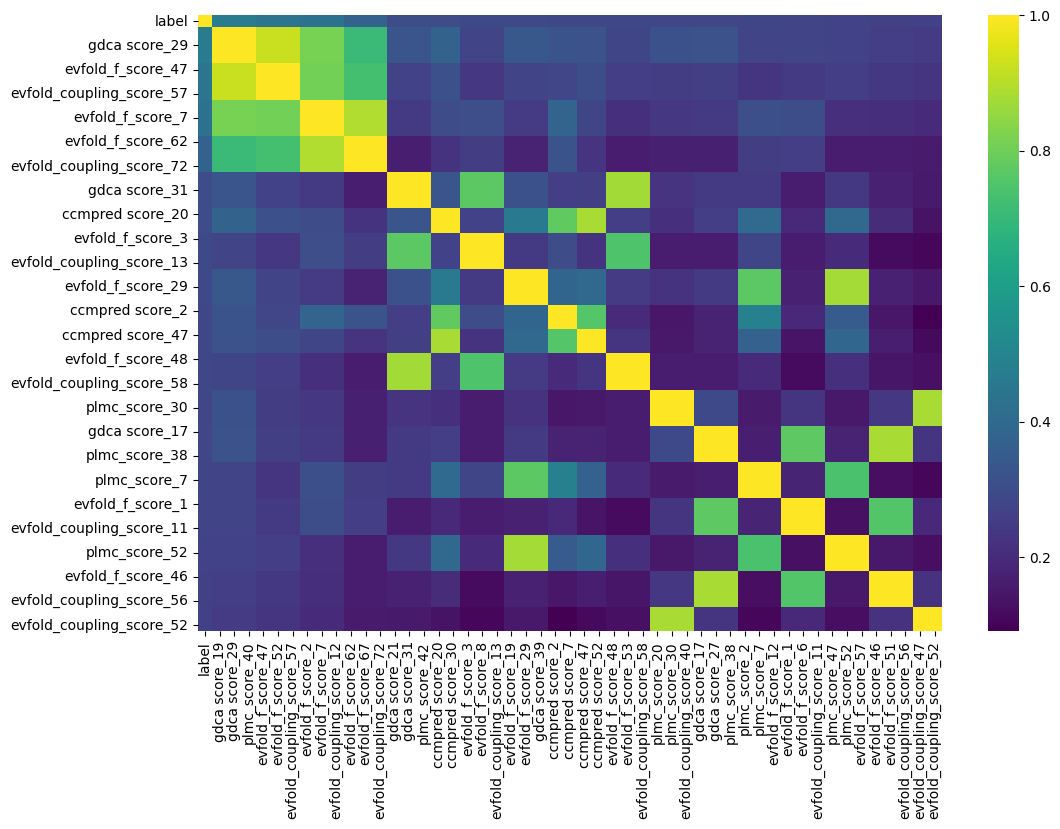

In [312]:
k = 51
cols = df.corr().nlargest(k, 'label')['label'].index
cm = df[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap = 'viridis');

In [29]:
important_cols = cols

In [30]:
test_df = df[important_cols]

In [84]:
test_df.columns

Index(['label', 'gdca score_19', 'gdca score_29', 'plmc_score_40',
       'evfold_f_score_47', 'evfold_f_score_52', 'evfold_coupling_score_57',
       'evfold_f_score_2', 'evfold_f_score_7', 'evfold_coupling_score_12',
       'evfold_f_score_62', 'evfold_f_score_67', 'evfold_coupling_score_72',
       'gdca score_21', 'gdca score_31', 'plmc_score_42', 'ccmpred score_20',
       'ccmpred score_30', 'evfold_f_score_3', 'evfold_f_score_8',
       'evfold_coupling_score_13', 'evfold_f_score_19', 'evfold_f_score_29',
       'gdca score_39', 'ccmpred score_2', 'ccmpred score_7',
       'ccmpred score_47', 'ccmpred score_52', 'evfold_f_score_48',
       'evfold_f_score_53', 'evfold_coupling_score_58', 'plmc_score_20',
       'plmc_score_30', 'evfold_coupling_score_40', 'gdca score_17',
       'gdca score_27', 'plmc_score_38', 'plmc_score_2', 'plmc_score_7',
       'evfold_f_score_12', 'evfold_f_score_1', 'evfold_f_score_6',
       'evfold_coupling_score_11', 'plmc_score_47', 'plmc_score_52',


In [5]:
#Define Random State to make models comparable:
rs = 1234
X = df.drop(["label", "identifier"], axis=1)
y = df["label"]

In [32]:
rs = 1234
X = test_df.drop(["label"], axis=1)
y = test_df["label"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify = y, random_state=rs)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 377 entries, identifier to ccmpred score_74
dtypes: float64(375), int64(1), object(1)
memory usage: 28.8+ MB


In [ ]:
# select the columns of data type "object"
object_cols = df.select_dtypes(include=['object']).columns

# print the column(s) of data type "object"
print(object_cols)

Index(['identifier'], dtype='object')


In [ ]:
df["identifier"].head()

0    123-244-302
1     40-146-168
2      41-16-286
3     39-115-217
4      80-13-211
Name: identifier, dtype: object

In [85]:
X.columns.tolist()

['gdca score_19',
 'gdca score_29',
 'plmc_score_40',
 'evfold_f_score_47',
 'evfold_f_score_52',
 'evfold_coupling_score_57',
 'evfold_f_score_2',
 'evfold_f_score_7',
 'evfold_coupling_score_12',
 'evfold_f_score_62',
 'evfold_f_score_67',
 'evfold_coupling_score_72',
 'gdca score_21',
 'gdca score_31',
 'plmc_score_42',
 'ccmpred score_20',
 'ccmpred score_30',
 'evfold_f_score_3',
 'evfold_f_score_8',
 'evfold_coupling_score_13',
 'evfold_f_score_19',
 'evfold_f_score_29',
 'gdca score_39',
 'ccmpred score_2',
 'ccmpred score_7',
 'ccmpred score_47',
 'ccmpred score_52',
 'evfold_f_score_48',
 'evfold_f_score_53',
 'evfold_coupling_score_58',
 'plmc_score_20',
 'plmc_score_30',
 'evfold_coupling_score_40',
 'gdca score_17',
 'gdca score_27',
 'plmc_score_38',
 'plmc_score_2',
 'plmc_score_7',
 'evfold_f_score_12',
 'evfold_f_score_1',
 'evfold_f_score_6',
 'evfold_coupling_score_11',
 'plmc_score_47',
 'plmc_score_52',
 'evfold_f_score_57',
 'evfold_f_score_46',
 'evfold_f_score_51

# Task 1: build a SVM for classifying whether a residue pair is contact or not. Use 10-fold crossvalidation, train and test a SVM with the following variations:
- a) Three different kernels: linear, polynomial of degree 2, and RBF.
- b) For each kernel, try three different penalty C= 0, 0.01, and 0.1
Report average ROC score for each case. Plot ROC curve for the case of RBF kernel with C=0.01.
Discuss the effects of variations on the performance.

## SVM w/Linear Kernel

### SVM w/Linear Kernel C=0

In [313]:
svm_clf = Pipeline([
    ('Scaler', StandardScaler()),
    ('Linear_svc', LinearSVC(C=1e-10, loss='hinge'))
])

In [314]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Linear_svc', LinearSVC(C=1e-10, loss='hinge'))])

In [315]:
print("Model training accuracy is: {:.2f}%".format(svm_clf.score(X_train, y_train)*100))

Model training accuracy is: 78.17%


In [316]:
print("Model training accuracy is: {:.2f}%".format(svm_clf.score(X_test, y_test)*100))

Model training accuracy is: 78.35%


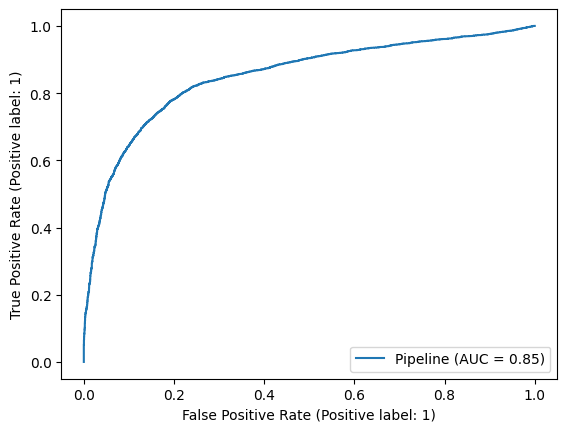

In [317]:
#Display ROC/AUC Curve for TRAINING Data:
RocCurveDisplay.from_estimator(svm_clf, X_train, y_train);

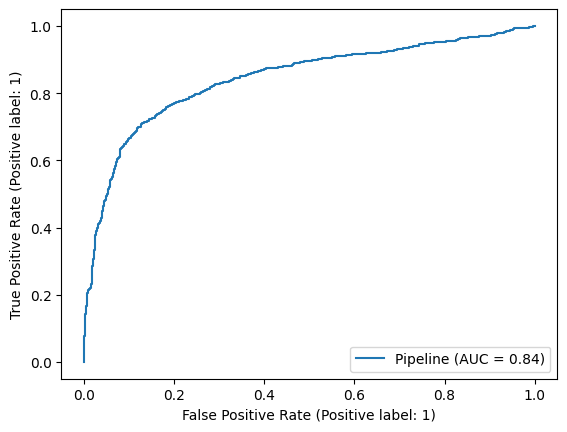

In [318]:
#Display ROC/AUC Curve for TESTING Data:
RocCurveDisplay.from_estimator(svm_clf, X_test, y_test);

In [319]:
y_pred = svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1000
           1       0.86      0.68      0.76      1000

    accuracy                           0.78      2000
   macro avg       0.80      0.78      0.78      2000
weighted avg       0.80      0.78      0.78      2000



In [320]:
scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.76875 0.7725  0.7875  0.79125 0.79625 0.765   0.7725  0.79375 0.80375
 0.76625]

 The mean cross validation score is 78.18%


In [321]:
scores = cross_val_score(svm_clf, X_test, y_test, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.79  0.815 0.805 0.765 0.79  0.755 0.755 0.805 0.775 0.785]

 The mean cross validation score is 78.40%


In [322]:
predictions= svm_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[890, 110],
       [323, 677]], dtype=int64)

### SVM w/Linear Kernel C=.01

In [323]:
svm_clf = Pipeline([
    ('Scaler', StandardScaler()),
    ('Linear_svc', LinearSVC(C=0.01, loss='hinge'))
])

In [324]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Linear_svc', LinearSVC(C=0.01, loss='hinge'))])

In [325]:
print("Model training accuracy is: {:.2f}%".format(svm_clf.score(X_train, y_train)*100))

Model training accuracy is: 79.45%


In [326]:
print("Model training accuracy is: {:.2f}%".format(svm_clf.score(X_test, y_test)*100))

Model training accuracy is: 78.80%


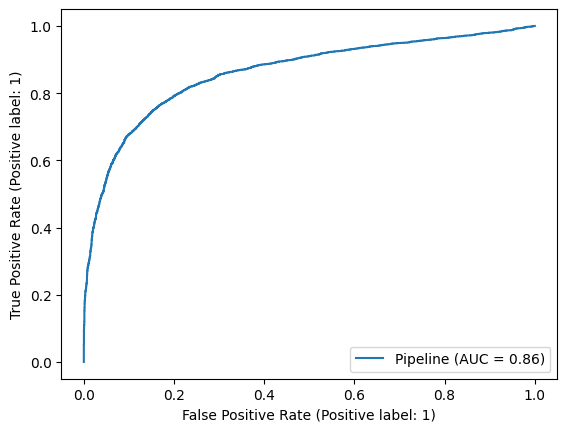

In [327]:
#Display ROC/AUC Curve for TRAINING Data:
RocCurveDisplay.from_estimator(svm_clf, X_train, y_train);

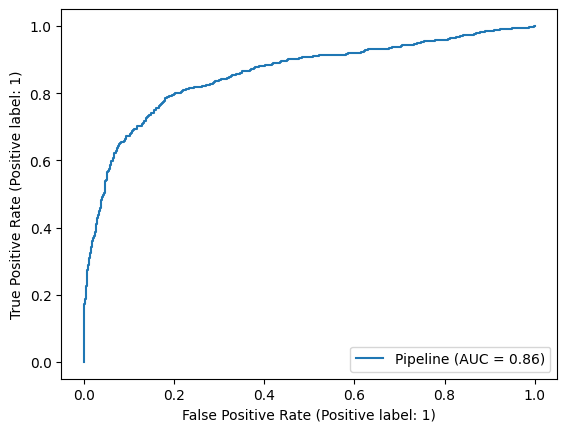

In [328]:
#Display ROC/AUC Curve for TESTING Data:
RocCurveDisplay.from_estimator(svm_clf, X_test, y_test);

In [329]:
y_pred = svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      1000
           1       0.85      0.70      0.77      1000

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000



In [330]:
scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.78375 0.8     0.7925  0.7925  0.80875 0.7775  0.785   0.7875  0.81625
 0.77875]

 The mean cross validation score is 79.23%


In [331]:
scores = cross_val_score(svm_clf, X_test, y_test, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.785 0.835 0.82  0.765 0.77  0.785 0.785 0.8   0.75  0.78 ]

 The mean cross validation score is 78.75%


In [332]:
predictions= svm_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[871, 129],
       [295, 705]], dtype=int64)

### SVM w/Linear Kernel C=.1

In [343]:
svm_clf = Pipeline([
    ('Scaler', StandardScaler()),
    ('Linear_svc', LinearSVC(C=0.10, loss='hinge'))
])

In [344]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Linear_svc', LinearSVC(C=0.1, loss='hinge'))])

In [345]:
print("Model training accuracy is: {:.2f}%".format(svm_clf.score(X_train, y_train)*100))

Model training accuracy is: 79.46%


In [346]:
print("Model training accuracy is: {:.2f}%".format(svm_clf.score(X_test, y_test)*100))

Model training accuracy is: 79.20%


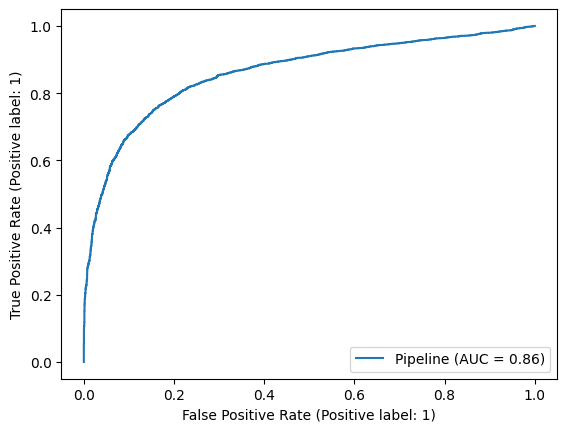

In [347]:
#Display ROC/AUC Curve for TRAINING Data:
RocCurveDisplay.from_estimator(svm_clf, X_train, y_train);

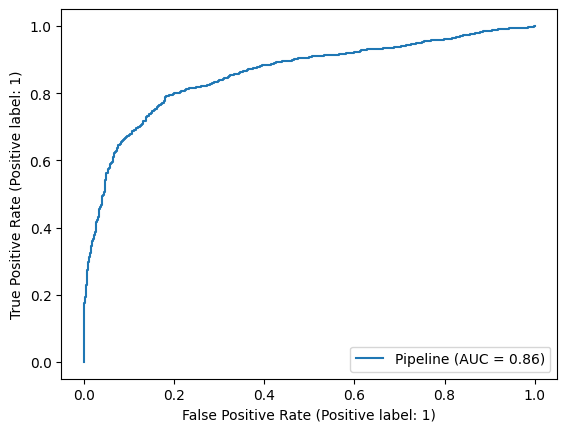

In [348]:
#Display ROC/AUC Curve for TESTING Data:
RocCurveDisplay.from_estimator(svm_clf, X_test, y_test);

In [349]:
y_pred = svm_clf.predict(X_test)

# Calculate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1000
           1       0.85      0.71      0.77      1000

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000



In [350]:
scores = cross_val_score(svm_clf, X_train, y_train, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.78625 0.8     0.7925  0.79125 0.80875 0.78125 0.78875 0.79    0.81625
 0.77875]

 The mean cross validation score is 79.34%


In [351]:
scores = cross_val_score(svm_clf, X_test, y_test, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.795 0.825 0.81  0.76  0.77  0.81  0.795 0.795 0.745 0.785]

 The mean cross validation score is 78.90%


In [352]:
predictions= svm_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[869, 131],
       [285, 715]], dtype=int64)

## SVM w/Polynomial of Degree 2 Kernel

### SVM w/Polynomial of Degree 2 Kernel C=0

In [113]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=0.00, loss="hinge"))
])

In [114]:
polynomial_svm_clf.fit(X_train, y_train)

ValueError: b'C <= 0'

In [413]:
#Given the eorr, I will use a very very small number as close to 0 as possible, since I have to have a value. By default, it's C=1:

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=1e-10, loss="hinge"))
])


In [414]:
polynomial_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=1e-10, loss='hinge'))])

In [415]:
print("Model training accuracy is: {:.2f}%".format(polynomial_svm_clf.score(X_train, y_train)*100))

Model training accuracy is: 69.00%


In [416]:
print("Model training accuracy is: {:.2f}%".format(polynomial_svm_clf.score(X_test, y_test)*100))

Model training accuracy is: 69.50%


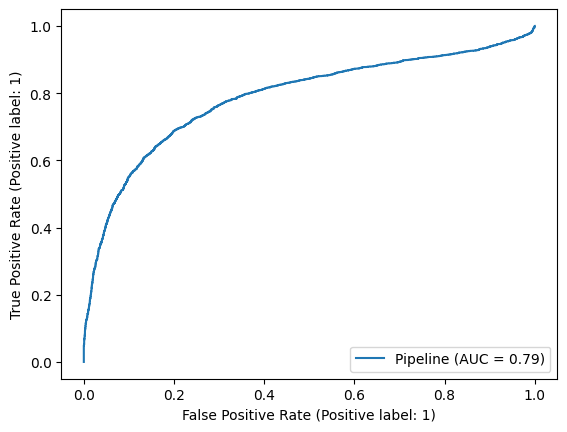

In [417]:
#Display ROC/AUC Curve for TRAINING Data:
RocCurveDisplay.from_estimator(polynomial_svm_clf, X_train, y_train);

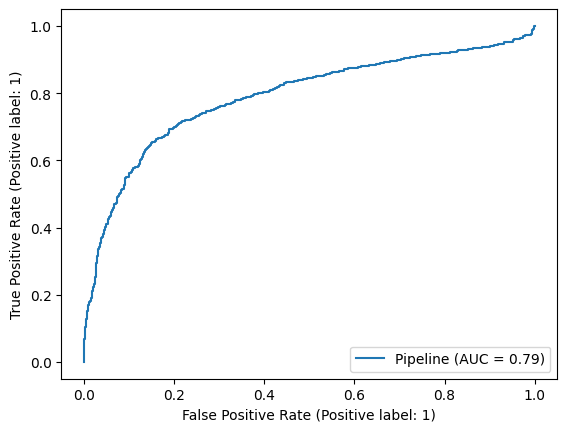

In [418]:
#Display ROC/AUC Curve for TESTING Data:
RocCurveDisplay.from_estimator(polynomial_svm_clf, X_test, y_test);

In [419]:
y_pred = polynomial_svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.94      0.75      1000
           1       0.88      0.45      0.60      1000

    accuracy                           0.69      2000
   macro avg       0.75      0.70      0.68      2000
weighted avg       0.75      0.69      0.68      2000



In [420]:
scores = cross_val_score(polynomial_svm_clf, X_train, y_train, cv=10)
print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.70625 0.67375 0.67875 0.6925  0.7     0.65625 0.68375 0.69    0.72875
 0.6825 ]

 The mean cross validation score is 68.92%


In [421]:
scores = cross_val_score(polynomial_svm_clf, X_test, y_test, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.645 0.725 0.7   0.68  0.695 0.695 0.715 0.74  0.66  0.675]

 The mean cross validation score is 69.30%


In [422]:
predictions= polynomial_svm_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[937,  63],
       [547, 453]], dtype=int64)

### SVM w/Polynomial of Degree 2 Kernel C=.01

In [423]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=0.01, loss="hinge"))
])

In [424]:
polynomial_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=0.01, loss='hinge'))])

In [425]:
print("Model training accuracy is: {:.2f}%".format(polynomial_svm_clf.score(X_train, y_train)*100))

Model training accuracy is: 80.75%


In [426]:
print("Model training accuracy is: {:.2f}%".format(polynomial_svm_clf.score(X_test, y_test)*100))

Model training accuracy is: 79.40%


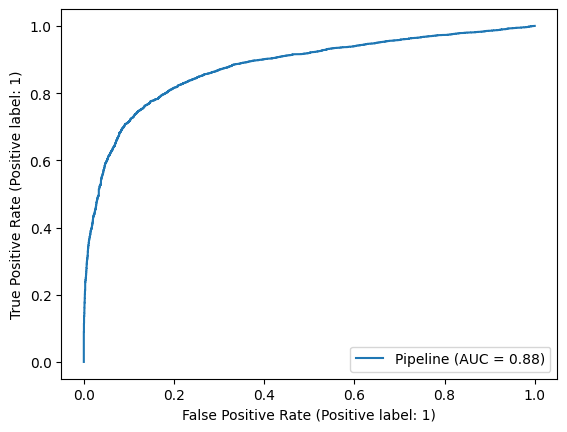

In [427]:
#Display ROC/AUC Curve for TRAINING Data:
RocCurveDisplay.from_estimator(polynomial_svm_clf, X_train, y_train);

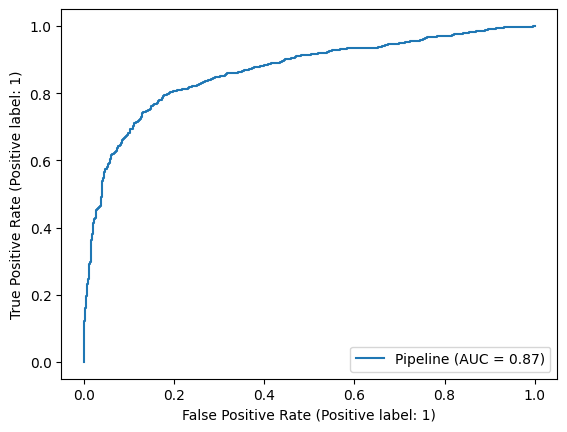

In [428]:
#Display ROC/AUC Curve for TESTING Data:
RocCurveDisplay.from_estimator(polynomial_svm_clf, X_test, y_test);

In [429]:
y_pred = polynomial_svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1000
           1       0.87      0.70      0.77      1000

    accuracy                           0.79      2000
   macro avg       0.81      0.79      0.79      2000
weighted avg       0.81      0.79      0.79      2000



In [430]:
scores = cross_val_score(polynomial_svm_clf, X_train, y_train, cv=10)
print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.81125 0.79625 0.8025  0.80375 0.80625 0.7875  0.79    0.81375 0.80125
 0.76875]

 The mean cross validation score is 79.81%


In [431]:
scores = cross_val_score(polynomial_svm_clf, X_test, y_test, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.815 0.81  0.81  0.785 0.75  0.795 0.79  0.825 0.77  0.735]

 The mean cross validation score is 78.85%


In [432]:
predictions= polynomial_svm_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[892, 108],
       [304, 696]], dtype=int64)

### SVM w/Polynomial of Degree 2 Kernel C=.1

In [514]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=.1, loss="hinge"))
])

In [515]:
polynomial_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=0.1, loss='hinge'))])

In [516]:
print("Model training accuracy is: {:.2f}%".format(polynomial_svm_clf.score(X_train, y_train)*100))

Model training accuracy is: 81.00%


In [517]:
print("Model training accuracy is: {:.2f}%".format(polynomial_svm_clf.score(X_test, y_test)*100))

Model training accuracy is: 79.55%


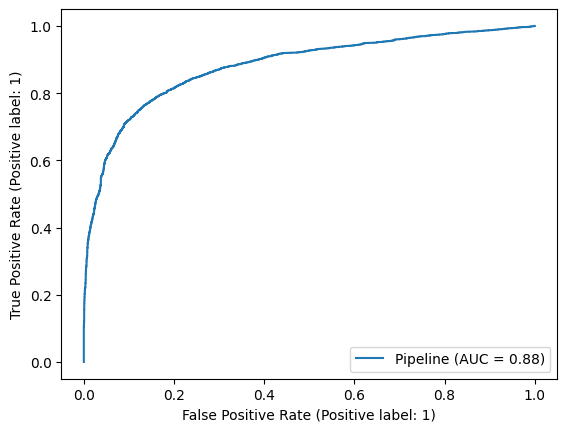

In [518]:
#Display ROC/AUC Curve for TRAINING Data:
RocCurveDisplay.from_estimator(polynomial_svm_clf, X_train, y_train);

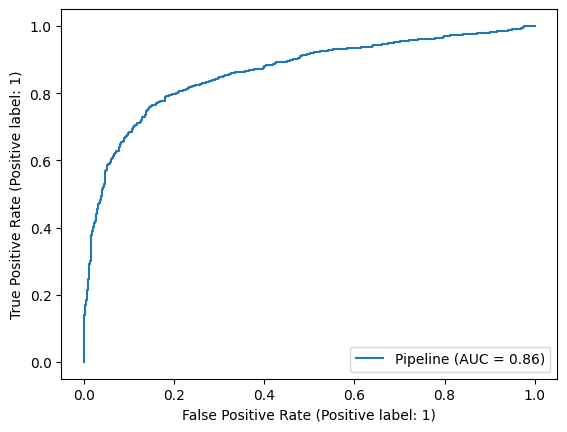

In [519]:
#Display ROC/AUC Curve for TESTING Data:
RocCurveDisplay.from_estimator(polynomial_svm_clf, X_test, y_test);

In [520]:
y_pred = polynomial_svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1000
           1       0.86      0.70      0.77      1000

    accuracy                           0.80      2000
   macro avg       0.81      0.80      0.79      2000
weighted avg       0.81      0.80      0.79      2000



In [521]:
scores = cross_val_score(polynomial_svm_clf, X_train, y_train, cv=10)
print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.805   0.79125 0.79875 0.81125 0.81125 0.78625 0.795   0.80875 0.7975
 0.765  ]

 The mean cross validation score is 79.70%


In [522]:
scores = cross_val_score(polynomial_svm_clf, X_test, y_test, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.805 0.805 0.835 0.745 0.76  0.79  0.785 0.785 0.75  0.735]

 The mean cross validation score is 77.95%


In [523]:
predictions= polynomial_svm_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[888, 112],
       [297, 703]], dtype=int64)

## SVM W/RBF Kernel

### SVM w/RBF Kernel C=0

In [ ]:
#Code from textbook, drop the gamma:

# rbf_kernel_svm_clf = Pipeline([
#     ("scaler", StandardScaler()),
#     ("svm_clf", SVC(kernel="rbf", gamma=5, C=1e-10))
# ])

In [494]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", C=1e-10))
])

In [495]:
rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1e-10))])

In [496]:
print("Model training accuracy is: {:.2f}%".format(rbf_kernel_svm_clf.score(X_train, y_train)*100))

Model training accuracy is: 79.17%


In [497]:
print("Model training accuracy is: {:.2f}%".format(rbf_kernel_svm_clf.score(X_test, y_test)*100))

Model training accuracy is: 78.95%


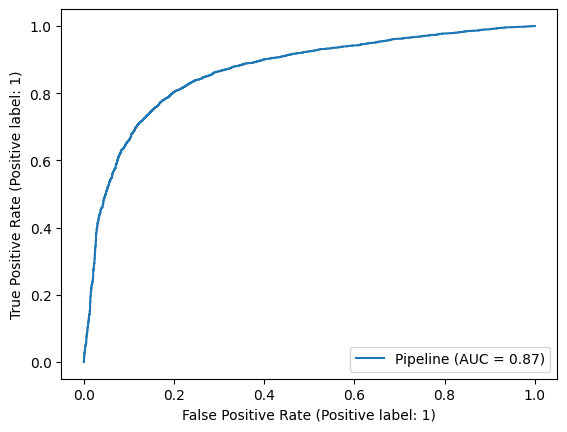

In [498]:
#Display ROC/AUC Curve for TRAINING Data:
RocCurveDisplay.from_estimator(rbf_kernel_svm_clf, X_train, y_train);

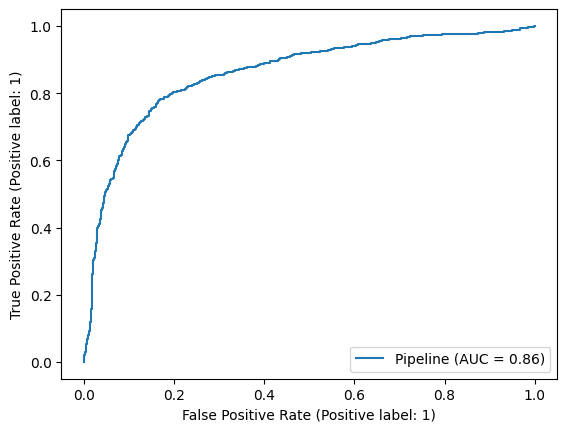

In [499]:
#Display ROC/AUC Curve for TESTING Data:
RocCurveDisplay.from_estimator(rbf_kernel_svm_clf, X_test, y_test);

In [500]:
y_pred = rbf_kernel_svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1000
           1       0.86      0.69      0.77      1000

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000



In [501]:
scores = cross_val_score(rbf_kernel_svm_clf, X_train, y_train, cv=10)
print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.795   0.77875 0.78375 0.80125 0.805   0.78125 0.77875 0.80625 0.8125
 0.77   ]

 The mean cross validation score is 79.12%


In [502]:
scores = cross_val_score(rbf_kernel_svm_clf, X_test, y_test, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.775 0.815 0.805 0.765 0.785 0.805 0.785 0.83  0.775 0.78 ]

 The mean cross validation score is 79.20%


In [503]:
predictions= rbf_kernel_svm_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[887, 113],
       [308, 692]], dtype=int64)

### SVM w/RBF Kernel C=.01

In [504]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", C=0.01))
])

In [505]:
rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=0.01))])

In [506]:
print("Model training accuracy is: {:.2f}%".format(rbf_kernel_svm_clf.score(X_train, y_train)*100))

Model training accuracy is: 80.21%


In [507]:
print("Model training accuracy is: {:.2f}%".format(rbf_kernel_svm_clf.score(X_test, y_test)*100))

Model training accuracy is: 80.40%


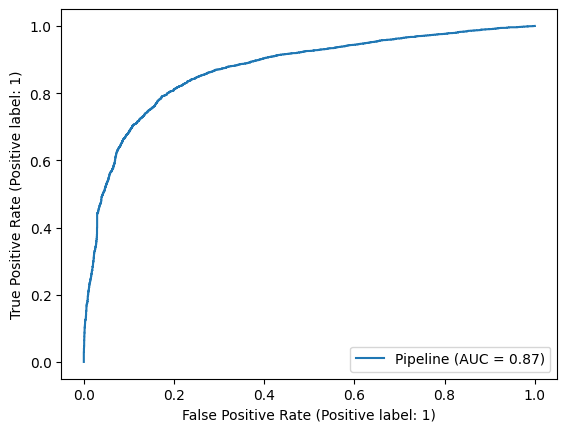

In [508]:
#Display ROC/AUC Curve for TRAINING Data:
RocCurveDisplay.from_estimator(rbf_kernel_svm_clf, X_train, y_train);

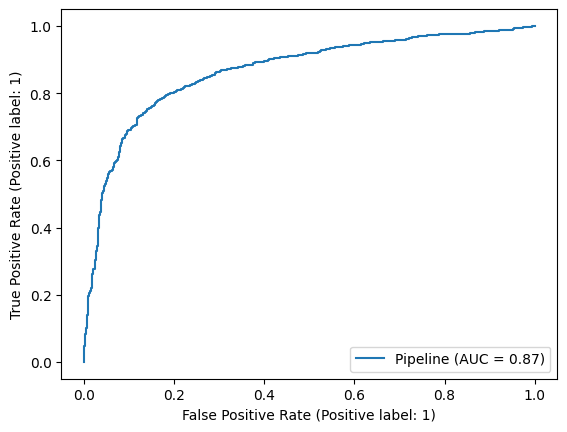

In [509]:
#Display ROC/AUC Curve for TESTING Data:
RocCurveDisplay.from_estimator(rbf_kernel_svm_clf, X_test, y_test);

In [510]:
y_pred = rbf_kernel_svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1000
           1       0.85      0.73      0.79      1000

    accuracy                           0.80      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.81      0.80      0.80      2000



In [511]:
scores = cross_val_score(rbf_kernel_svm_clf, X_train, y_train, cv=10)
print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.8025  0.78625 0.79875 0.805   0.8225  0.80125 0.8     0.80875 0.81
 0.7775 ]

 The mean cross validation score is 80.12%


In [512]:
scores = cross_val_score(rbf_kernel_svm_clf, X_test, y_test, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.77  0.82  0.815 0.77  0.8   0.805 0.8   0.835 0.775 0.775]

 The mean cross validation score is 79.65%


In [513]:
predictions= rbf_kernel_svm_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[873, 127],
       [265, 735]], dtype=int64)

### SVM w/RBF Kernel C=.1

In [524]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", C=.1))
])

In [525]:
rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=0.1))])

In [526]:
print("Model training accuracy is: {:.2f}%".format(rbf_kernel_svm_clf.score(X_train, y_train)*100))

Model training accuracy is: 81.09%


In [527]:
print("Model training accuracy is: {:.2f}%".format(rbf_kernel_svm_clf.score(X_test, y_test)*100))

Model training accuracy is: 80.55%


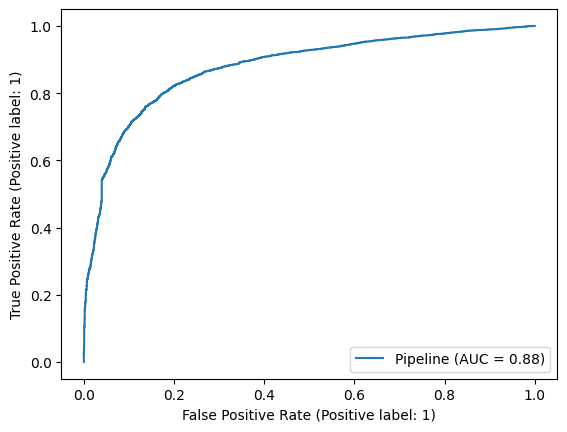

In [528]:
#Display ROC/AUC Curve for TRAINING Data:
RocCurveDisplay.from_estimator(rbf_kernel_svm_clf, X_train, y_train);

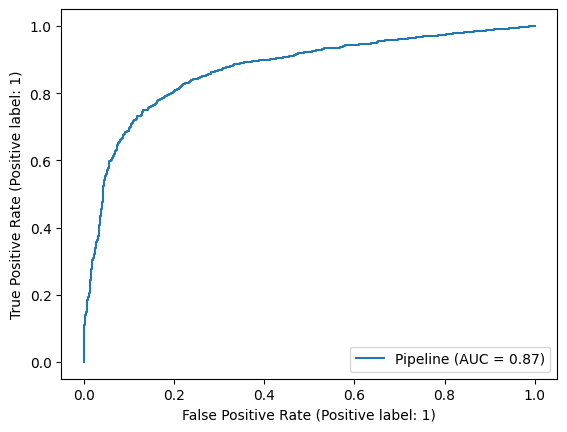

In [529]:
#Display ROC/AUC Curve for TESTING Data:
RocCurveDisplay.from_estimator(rbf_kernel_svm_clf, X_test, y_test);

In [530]:
y_pred = rbf_kernel_svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82      1000
           1       0.84      0.75      0.79      1000

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.80      2000
weighted avg       0.81      0.81      0.80      2000



In [531]:
scores = cross_val_score(rbf_kernel_svm_clf, X_train, y_train, cv=10)
print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.81    0.8     0.8     0.80625 0.82875 0.81375 0.805   0.81625 0.8175
 0.78375]

 The mean cross validation score is 80.81%


In [532]:
scores = cross_val_score(rbf_kernel_svm_clf, X_test, y_test, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.79  0.825 0.83  0.79  0.78  0.81  0.805 0.83  0.79  0.78 ]

 The mean cross validation score is 80.30%


In [533]:
predictions= rbf_kernel_svm_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[861, 139],
       [250, 750]], dtype=int64)

# Task 2: build a decision tree (CART algorithm) for classifying whether a residue pair is contact or
not. Again, use 10-fold cross-validation to evaluate the performance. Report precision/recall,
and discuss the effect of regularization on performance.
- a) Full tree without regularization
- b) Max-height = 5


## a) Full Tree without Regularization:

In [534]:
tree_reg = DecisionTreeRegressor()

In [535]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [536]:
print("Model training accuracy is: {:.2f}%".format(tree_reg.score(X_train, y_train)*100))

Model training accuracy is: 100.00%


In [537]:
print("Model training accuracy is: {:.2f}%".format(tree_reg.score(X_test, y_test)*100))

Model training accuracy is: -8.40%


In [538]:
scores = cross_val_score(tree_reg, X_train, y_train, cv=10)
print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [-0.13479451 -0.10866553 -0.19429948  0.01994487 -0.13006357 -0.16018128
 -0.18589683 -0.0455293  -0.0455293  -0.12056729]

 The mean cross validation score is -11.06%


In [539]:
scores = cross_val_score(tree_reg, X_test, y_test, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [-0.18963605 -0.40505821 -0.24198718 -0.28115304 -0.31061599  0.0136876
  0.05849359 -0.3612251  -0.147343   -0.36      ]

 The mean cross validation score is -22.25%


In [540]:
#Given that this is a regressor model (predicting continuous values) and we are working with binary values, we need 
#to create a threshold that will label the predicted value as either 0 or 1:


#get the probability of the value being 1 using model:
y_pred_probability = tree_reg.predict(X_test)

#transform that associated probability into a binary value: if less than or equal to .5 == 0 & x  >= .5 == 1:
y_pred = (y_pred_probability >= 0.5).astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.74      0.71      0.72      1000

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



In [541]:
predictions= svm_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[869, 131],
       [285, 715]], dtype=int64)

## b) Max-height = 5:

In [270]:
tree_reg = DecisionTreeRegressor(max_depth=5)

In [271]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [272]:
print("Model training accuracy is: {:.2f}%".format(tree_reg.score(X_train, y_train)*100))

Model training accuracy is: 42.98%


In [273]:
print("Model training accuracy is: {:.2f}%".format(tree_reg.score(X_test, y_test)*100))

Model training accuracy is: 34.96%


In [274]:
scores = cross_val_score(tree_reg, X_train, y_train, cv=10)
print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.35798765 0.39377633 0.3427675  0.39453411 0.3897333  0.37444742
 0.34720657 0.42440016 0.37828335 0.32598184]

 The mean cross validation score is 37.29%


In [275]:
scores = cross_val_score(tree_reg, X_test, y_test, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.28806498 0.30304946 0.3247694  0.29738309 0.22719189 0.36158261
 0.33906675 0.29856834 0.20715379 0.28819876]

 The mean cross validation score is 29.35%


In [278]:
#Given that this is a regressor model (predicting continuous values) and we are working with binary values, we need 
#to create a threshold that will label the predicted value as either 0 or 1:


#get the probability of the value being 1 using model:
y_pred_probability = tree_reg.predict(X_test)

#transform that associated probability into a binary value: if less than or equal to .5 == 0 & x  >= .5 == 1:
y_pred = (y_pred_probability >= 0.5).astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      1000
           1       0.81      0.71      0.76      1000

    accuracy                           0.77      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.77      0.77      2000



In [ ]:
#regularization functions to implment from textbook: min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes

# Task 3: build a random forest for classifying whether a residue pair is contact or not. Again, use
10-fold cross-validation to evaluate the performance. Report precision/recall, and report the
top five features ranked by their importance. 

In [207]:
#Create a Random Forest Classifier Model to Predict Label w/out tuning:

rfc = RandomForestClassifier(random_state=rs)

rfc.fit(X_train, y_train)

print("Model training accuracy is: {:.2f}%".format(rfc.score(X_train, y_train)*100))
print("\nModel test accuracy is: {:.2f}%".format(rfc.score(X_test,y_test)*100))

Model training accuracy is: 100.00%

Model test accuracy is: 80.35%


In [208]:
#Let's see which parameters we can tune:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#regularization functions to implment from textbook: min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes

In [212]:
#For the sake of time:


param_grid = {'max_depth': [2, 4, 6, 8, 10, 12, None],
              'n_estimators': np.arange(100, 500, 50)}






## Run the Grid search
sh = HalvingGridSearchCV(rfc,
                         param_grid,
                         cv=10,
                         factor=2, # The ‘halving’ parameter, which determines the proportion of  
                                   # candidates that are selected for each subsequent iteration.
                         resource='n_samples', # Defines the resource that increases with each iteration:
                                               #n_samples, n_iterations, n_estimators, or any parameter   #n_samples if enough data
                         max_resources=50,
                        random_state = rs).fit(X_train, y_train)
sh.best_estimator_

RandomForestClassifier(max_depth=2, random_state=1234)

In [542]:
#given that the above code represents our tuned Random Forest Classifier model, lets now implment that into our own model:


rfc = RandomForestClassifier(max_depth=2, random_state=1234)

rfc.fit(X_train, y_train)

print("Model training accuracy is: {:.2f}%".format(rfc.score(X_train, y_train)*100))
print("\nModel test accuracy is: {:.2f}%".format(rfc.score(X_test,y_test)*100))

Model training accuracy is: 76.79%

Model test accuracy is: 75.45%


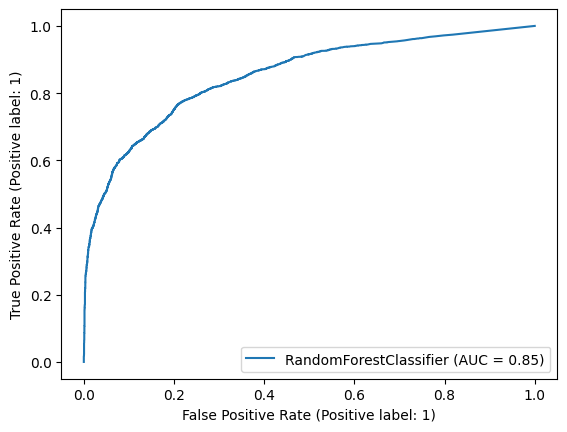

In [543]:
#Display ROC/AUC Curve for TRAINING Data:
RocCurveDisplay.from_estimator(rfc, X_train, y_train);

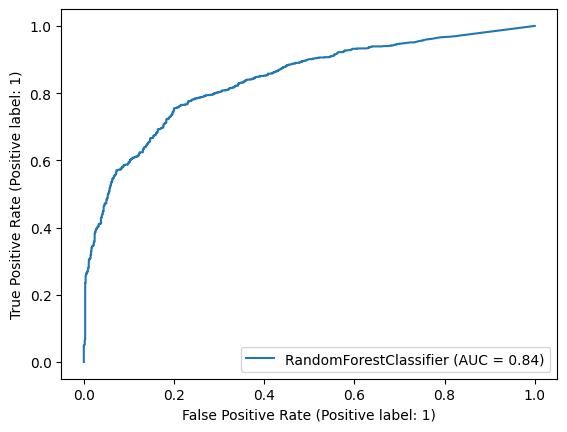

In [544]:
#Display ROC/AUC Curve for TESTING Data:
RocCurveDisplay.from_estimator(rfc, X_test, y_test);

In [545]:
y_pred = rfc.predict(X_test)

# Calculate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78      1000
           1       0.82      0.65      0.73      1000

    accuracy                           0.75      2000
   macro avg       0.77      0.75      0.75      2000
weighted avg       0.77      0.75      0.75      2000



In [546]:
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.77125 0.76125 0.76    0.755   0.7825  0.75875 0.765   0.76625 0.77625
 0.74625]

 The mean cross validation score is 76.42%


In [547]:
scores = cross_val_score(rfc, X_test, y_test, cv=10)

print("Array of actual scores: ", scores)

print("\n The mean cross validation score is {:.2f}%".format(scores.mean()*100))

Array of actual scores:  [0.755 0.79  0.825 0.73  0.74  0.765 0.755 0.78  0.75  0.775]

 The mean cross validation score is 76.65%


In [548]:
predictions= rfc.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[857, 143],
       [348, 652]], dtype=int64)

In [284]:
rfc.feature_importances_

array([7.33505418e-02, 1.23859079e-01, 1.01033162e-01, 7.31356982e-02,
       5.65837476e-02, 5.77923077e-02, 9.67716802e-02, 1.16588246e-01,
       1.21118339e-01, 2.15033643e-02, 1.80701158e-02, 4.16496555e-02,
       1.16195191e-02, 2.25541486e-02, 1.29766531e-02, 1.42420651e-04,
       5.90594549e-03, 1.72791118e-03, 5.45127495e-03, 2.35670585e-03,
       0.00000000e+00, 1.02692406e-03, 0.00000000e+00, 0.00000000e+00,
       1.32903459e-04, 1.24358959e-03, 7.70374962e-05, 6.81980332e-03,
       0.00000000e+00, 0.00000000e+00, 1.68338530e-03, 4.47302573e-03,
       2.84576252e-03, 0.00000000e+00, 4.12686476e-04, 0.00000000e+00,
       4.36109335e-03, 1.55162831e-04, 2.97394754e-03, 0.00000000e+00,
       1.24803796e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.71791447e-04, 1.57617814e-03, 1.98946349e-03, 3.11780659e-03,
       2.12411880e-03, 0.00000000e+00])

In [283]:
X.columns.tolist()

['gdca score_19',
 'gdca score_29',
 'plmc_score_40',
 'evfold_f_score_47',
 'evfold_f_score_52',
 'evfold_coupling_score_57',
 'evfold_f_score_2',
 'evfold_f_score_7',
 'evfold_coupling_score_12',
 'evfold_f_score_62',
 'evfold_f_score_67',
 'evfold_coupling_score_72',
 'gdca score_21',
 'gdca score_31',
 'plmc_score_42',
 'ccmpred score_20',
 'ccmpred score_30',
 'evfold_f_score_3',
 'evfold_f_score_8',
 'evfold_coupling_score_13',
 'evfold_f_score_19',
 'evfold_f_score_29',
 'gdca score_39',
 'ccmpred score_2',
 'ccmpred score_7',
 'ccmpred score_47',
 'ccmpred score_52',
 'evfold_f_score_48',
 'evfold_f_score_53',
 'evfold_coupling_score_58',
 'plmc_score_20',
 'plmc_score_30',
 'evfold_coupling_score_40',
 'gdca score_17',
 'gdca score_27',
 'plmc_score_38',
 'plmc_score_2',
 'plmc_score_7',
 'evfold_f_score_12',
 'evfold_f_score_1',
 'evfold_f_score_6',
 'evfold_coupling_score_11',
 'plmc_score_47',
 'plmc_score_52',
 'evfold_f_score_57',
 'evfold_f_score_46',
 'evfold_f_score_51

In [311]:
#create the list with their respective importance score:
features_list = [(name, score) for name, score in zip(X.columns.tolist(), rfc.feature_importances_)]

sorted_importance_list = sorted(features_list, key=lambda x: x[1], reverse=True)
    
for name, score in sorted_importance_list[:5]:
    print(name, "{:.2f}".format(score))

gdca score_29 0.12
evfold_coupling_score_12 0.12
evfold_f_score_7 0.12
plmc_score_40 0.10
evfold_f_score_2 0.10
